In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.DataFrame({'x':[2, 2, 8, 5, 7, 6, 1, 4], 'y': [10, 5, 4, 8, 5, 4, 2, 9]})

{1: [2, 10], 2: [5, 8], 3: [1, 2]}


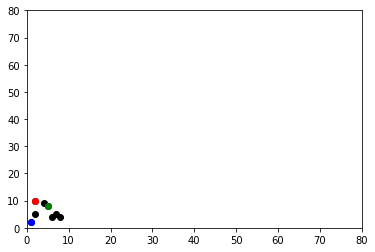

In [13]:
# When you set a seed, the seed value is multiplied my a large number and then modulo of it is calculated and this becomes the random number selected and this is used as new seed to calculate next random numbers
# When we set a seed, the same calculations are repeated. So we get the same random numbers. This can be used for easier debugging
# By setting a seed value, Our code will always take in same random numbers and generate the same output.
np.random.seed(200) 

# Define the number of clusters
k=3

# Creating a Dictionary of Random Initial Centroids
#centroids = {
 #           i+1 : [np.random.randint(0, 80), np.random.randint(0, 80)]
 #           for i in range(k)
        
#}

centroids = { 1:[2, 10], 2:[5, 8], 3:[1,2]
}
print(centroids)

# Plotting Data Points other than the chosen Centroids
plt.scatter(df['x'], df['y'], color='k')

# Color Mapping for the clusters
colmap = {1: 'r', 2:'g', 3:'b'}

# Plotting the Centroids with corresponding Cluster colors

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

   x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  2  10         0.000000         3.605551         8.062258        1     r
1  2   5         5.000000         4.242641         3.162278        3     b
2  8   4         8.485281         5.000000         7.280110        2     g
3  5   8         3.605551         0.000000         7.211103        2     g
4  7   5         7.071068         3.605551         6.708204        2     g


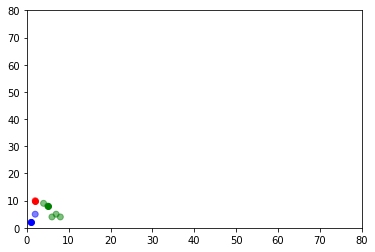

In [14]:
# Function to assign clusters to the dataitems based on eucledian distance from the previously chosen centroids
def clusterAssignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2))
    
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x : colmap[x])
    return df

df = clusterAssignment(df, centroids)
print(df.head())

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

   x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  2  10         1.943651         7.557189         6.519202        1     r
1  2   5         4.333333         5.044249         1.581139        3     b
2  8   4         6.616478         1.054093         6.519202        2     g
3  5   8         1.666667         4.176655         5.700877        1     r
4  7   5         5.206833         0.666667         5.700877        2     g
5  6   4         5.517648         1.054093         4.527693        2     g
6  1   2         7.490735         6.437736         1.581139        3     b
7  4   9         0.333333         5.547772         6.041523        1     r


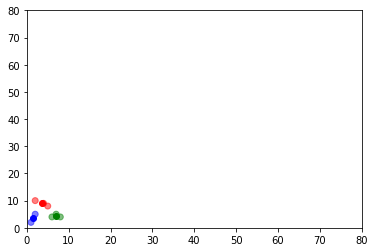

In [16]:
import copy

# Copy module has 2 types of copy:
# deepcopy(object) - Creates a new object which is an independent copy of the original object 
# copy(object) - Shallow Copy - creates a new object which references the original object
# deepcopy changes doesnt affect the original copy, shallowcopy affects original object values
old_centroids = copy.deepcopy(centroids)


# Function to recalibarate centroids based on the assignment step
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return k
while True:
    closest_centroids = copy.deepcopy(df['closest'])
    centroids = update(centroids)
    df = clusterAssignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

print(df)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()